In [28]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [83]:
file_path = "../eta-pi-data/merged_Eta.h5"
# file_path = "../eta-pi-data/merged_NCPi0.h5"

In [80]:
with h5py.File(file_path, 'r') as f:
    print("Keys (datasets/groups) in HDF5 file:", list(f.keys()))
    print("Keys (datasets/groups) in HDF5 file:", list(f['spacepoint_table'].keys()))
    # If your data is nested, explore further
    # for key in f.keys():
    #     if isinstance(f[key], h5py.Group):
    #         print(f"  Subkeys in {key}:", list(f[key].keys()))

    # Example: print shape of a known dataset (replace 'points_data' with your actual key)
    if 'spacepoints_table' in f:
        print(f"Shape of 'points_data': {f['points_data'].shape}")
        print(f"Type of 'points_data': {f['points_data'].dtype}")
    # Identify how labels/classes are stored
    if 'labels' in f:
        print(f"Shape of 'labels': {f['labels'].shape}")

    sp = f['spacepoint_table']

    # print(f['spacepoint_table/event_id'][:50])
    # print(f['spacepoint_table/event_id.seq_cnt'][:500])
    # print(f['spacepoint_table/spacepoint_id'][:50])

    current_index = [0, 0, 0]
    current_num_points = 0
    num_points = []
    print(len(sp['event_id']))
    for a in tqdm(sp['event_id'][:-1]):
        if a[0] == current_index[0] and a[1] == current_index[1] and a[2] == current_index[2]:
            current_num_points += 1
        else:
            # print(current_num_points)
            num_points.append(current_num_points)
            current_num_points = 1
            current_index = a
        # print(current_num_points)

# num_points = num_points[1:-1] # Remove first zero



Keys (datasets/groups) in HDF5 file: ['edep_table', 'event_table', 'hit_table', 'opflash_table', 'opflashsumpe_table', 'ophit_table', 'particle_table', 'spacepoint_table']
Keys (datasets/groups) in HDF5 file: ['event_id', 'hit_id', 'metadata', 'position', 'spacepoint_id']
54259683


100%|██████████| 54259682/54259682 [00:41<00:00, 1299976.11it/s]


[0, 1150, 309, 1238, 426, 1191, 1053, 814, 1169, 1599, 1137, 4893, 734, 1269, 1652, 525, 40, 672, 1047, 1367, 2946, 415, 875, 1131, 570, 1468, 315, 1538, 921, 531, 1006, 4824, 941, 238, 851, 1178, 443, 230, 550, 191, 195, 1901, 890, 487, 1243, 1444, 803, 4024, 1162, 412, 879, 730, 430, 779, 781, 1856, 475, 1559, 889, 389, 969, 423, 1275, 175, 1632, 655, 738, 347, 746, 1187, 3740, 1857, 613, 384, 759, 256, 334, 1086, 527, 1498, 1205, 173, 1465, 870, 705, 1379, 1416, 256, 924, 355, 802, 390, 534, 513, 1369, 308, 1543, 202, 184, 419, 296, 258, 255, 34, 2139, 298, 1768, 385, 1739, 1393, 276, 179, 521, 1034, 1122, 2289, 677, 1085, 625, 56, 1113, 44, 311, 765, 202, 4327, 2292, 1072, 1249, 1225, 287, 382, 191, 425, 1890, 413, 1693, 926, 1454, 1114, 1191, 473, 27, 349, 1606, 316, 259, 1479, 2091, 315, 463, 776, 1115, 1559, 1456, 1324, 364, 919, 2386, 283, 373, 1297, 1562, 392, 1914, 826, 411, 1105, 1479, 1095, 1498, 665, 1105, 1246, 1589, 952, 958, 1214, 896, 1493, 1305, 1573, 1605, 1183, 968,

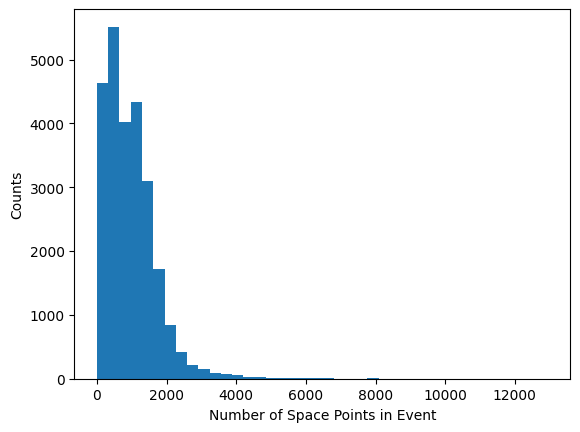

In [71]:
print(num_points)

print(max(num_points))
print(len(num_points))

fig, ax= plt.subplots()
ax.hist(num_points, 40)
ax.set_xlabel(f'Number of Space Points in Event')
ax.set_ylabel(f'Counts')
plt.show()

In [ ]:
with h5py.File(file_path, 'r') as f:
    print("Keys (datasets/groups) in HDF5 file:", list(f.keys()))
    print("Keys (datasets/groups) in HDF5 file:", list(f['spacepoint_table'].keys()))

    print(f['edep_table'].keys())
    print(f['hit_table'].keys())
    print(f['particle_table'].keys())


    # # print(f['edep_table']['energy_fraction'][:10])
    # print(f['hit_table']['integral'][:10])
    print(f['hit_table']['hit_id'][:10000])
    # print(f['hit_table']['local_plane'][:10])

    # print(np.count_nonzero(f['spacepoint_table/event_id.seq_cnt'][:20, 0] == f['hit_table/event_id.seq_cnt'][:20, 0]))
    print(len(f['hit_table/event_id.seq_cnt']))
    print(len(f['spacepoint_table/event_id.seq_cnt']))
    print(f['spacepoint_table']['hit_id'][:1500])
    print(f['spacepoint_table']['spacepoint_id'][:10])

    f_sub = f['spacepoint_table/event_id.seq_cnt'][:]
    h_sub = f['hit_table/event_id.seq_cnt'][:]
    h_all = f['hit_table/hit_id'][:]

    # The following tests whether the hit_ids for a single event are just counting up in order
    test = True
    starting_index = 0
    for event_index, num_points in tqdm(h_sub):

        if not np.all(h_all[starting_index:starting_index+num_points].transpose() == range(num_points)):
            print('failed')

        starting_index+=num_points

    # print(f['spacepoint_table/event_id'][f['spacepoint_table/metadata'][:, 0]])
    # print(f['spacepoint_table/hit_id'][f['spacepoint_table/metadata'][:, 0]])

Keys (datasets/groups) in HDF5 file: ['edep_table', 'event_table', 'hit_table', 'opflash_table', 'opflashsumpe_table', 'ophit_table', 'particle_table', 'spacepoint_table']
Keys (datasets/groups) in HDF5 file: ['event_id', 'event_id.seq_cnt', 'hit_id', 'metadata', 'position', 'sequence_info', 'spacepoint_id']
<KeysViewHDF5 ['energy', 'energy_fraction', 'event_id', 'event_id.seq_cnt', 'g4_id', 'hit_id']>
<KeysViewHDF5 ['event_id', 'event_id.seq_cnt', 'hit_id', 'integral', 'local_plane', 'local_time', 'local_wire', 'rms', 'sequence_info', 'tpc']>
<KeysViewHDF5 ['category', 'end_position', 'end_position_corr', 'end_process', 'end_wire_pos', 'end_wire_time', 'event_id', 'event_id.seq_cnt', 'g4_id', 'g4_pdg', 'instance', 'momentum', 'parent_id', 'start_position', 'start_position_corr', 'start_process', 'start_wire_pos', 'start_wire_time']>
[[  0]
 [  1]
 [  2]
 ...
 [912]
 [913]
 [914]]
25427
25288
[[257 357 848]
 [259 354 848]
 [253 362 849]
 ...
 [ 53 593  -1]
 [ 53 595  -1]
 [ 52 597  -1]

100%|██████████| 25427/25427 [00:01<00:00, 17524.04it/s]
